In [8]:
import numpy as np
import os
import cv2
import matplotlib
import matplotlib.pyplot as plt
import time

from matplotlib.font_manager import fontManager
#for i in sorted(fontManager.get_font_names()):
#    print(i)
matplotlib.rc('font', family='Microsoft JhengHei')


In [9]:
def guided_filter_opencvboxFilter(I, p, r, eps):

    # 限單通道使用
    I = I
    p = p
    r = r
    eps = eps

    mean_I  = cv2.boxFilter(I  , -1, (2*r+1, 2*r+1), normalize = True)
    mean_p  = cv2.boxFilter(p  , -1, (2*r+1, 2*r+1), normalize = True)
    mean_Ip = cv2.boxFilter(I*p, -1, (2*r+1, 2*r+1), normalize = True)
    cov_Ip  = mean_Ip - mean_I * mean_p

    mean_II = cv2.boxFilter(I*I, -1, (2*r+1, 2*r+1), normalize = True)
    var_I   = mean_II - mean_I * mean_I

    a       = cov_Ip / (var_I + eps)
    b       = mean_p - a * mean_I

    mean_a  = cv2.boxFilter(a, -1, (2*r+1, 2*r+1), normalize = True)
    mean_b  = cv2.boxFilter(b, -1, (2*r+1, 2*r+1), normalize = True)

    q       = mean_a * I + mean_b

    # output = float32
    return q

In [10]:
def boxfilter(image, r):
    r = r

    padded_image = np.pad(image, r, mode='reflect')
    boxfilter_result = np.zeros_like(image, dtype=np.float32)

    for i in range(r, padded_image.shape[0] - r):
        for j in range(r, padded_image.shape[1] - r):
            local_region = padded_image[i - r:i + r + 1, j - r:j + r + 1]
            boxfilter_result[i - r, j - r] = np.sum(local_region)

    # output = float32
    return boxfilter_result


def guided_filter_defboxfilter(I, p, r, eps):

    # 限單通道使用
    I = I
    p = p
    r = r
    eps = eps

    H, W = I.shape
    N = boxfilter(np.ones((H, W), dtype=np.float32), r)

    mean_I  = boxfilter(I, r) / N
    mean_p  = boxfilter(p, r) / N
    mean_Ip = boxfilter(I*p, r) / N
    cov_Ip  = mean_Ip - mean_I * mean_p

    mean_II = boxfilter(I*I, r) / N
    var_I   = mean_II - mean_I * mean_I

    a       = cov_Ip / (var_I + eps)
    b       = mean_p - a * mean_I

    mean_a  = boxfilter(a, r) / N
    mean_b  = boxfilter(b, r) / N

    q       = mean_a * I + mean_b

    # output = float32
    return q

In [11]:
image = (cv2.imread("cones.png").astype(np.float32)) / 255.0
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
d = (cv2.imread("deep learning_d (cones).png", cv2.IMREAD_GRAYSCALE).astype(np.float32)) / 255.0

r = 60
eps = 1e-5


start_time = time.time()
guided_filter_opencvboxFilter = guided_filter_opencvboxFilter(image_gray, d, r, eps)
end_time = time.time()
print(f"guided gilter ， opencv的boxfilter運算時間: {end_time - start_time:.4f} 秒")

start_time = time.time()
guided_filter_defboxfilter = guided_filter_defboxfilter(image_gray, d, r, eps)
end_time = time.time()
print(f"guided gilter ， 自定義boxfilter的運算時間: {end_time - start_time:.4f} 秒")

start_time = time.time()
opencv = cv2.ximgproc.guidedFilter(guide=image_gray, src=d, radius=r, eps=eps)
end_time = time.time()
print(f"guided gilter ， opencv內建的GF運算時間: {end_time - start_time:.4f} 秒")

guided gilter ， opencv的boxfilter運算時間: 0.0040 秒
guided gilter ， 自定義boxfilter的運算時間: 7.8414 秒
guided gilter ， opencv內建的GF運算時間: 0.0030 秒


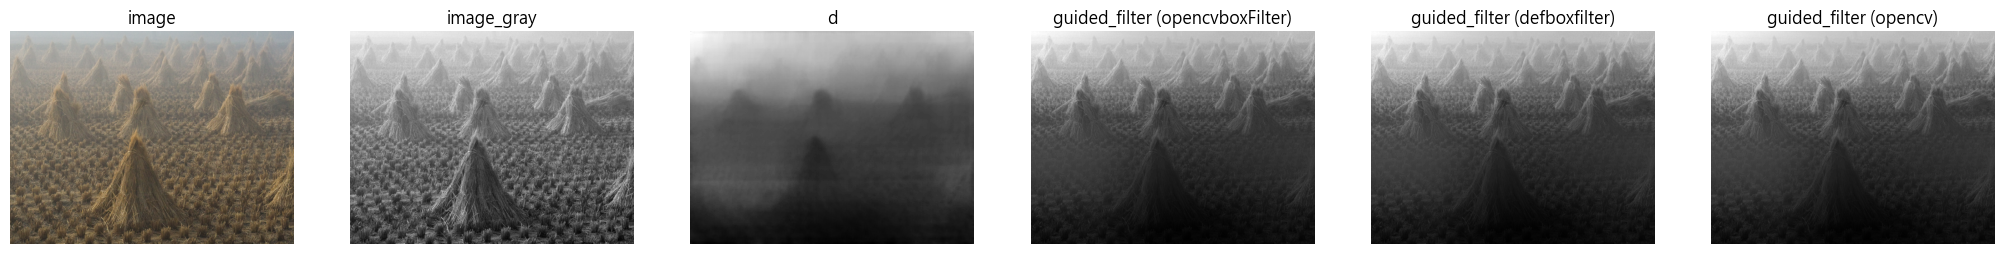

In [12]:
plt.figure(figsize=(30, 8))

plt.subplot(1, 7, 1)
plt.title('image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
plt.axis("off")

plt.subplot(1, 7, 2)
plt.title('image_gray')
plt.imshow(image_gray, cmap="gray")
plt.axis("off")

plt.subplot(1, 7, 3)
plt.title('d')
plt.imshow(d, cmap="gray")
plt.axis("off")

plt.subplot(1, 7, 4)
plt.title('guided_filter (opencvboxFilter)')
plt.imshow(guided_filter_opencvboxFilter, cmap="gray")
plt.axis("off")

plt.subplot(1, 7, 5)
plt.title('guided_filter (defboxfilter)')
plt.imshow(guided_filter_defboxfilter, cmap="gray")
plt.axis("off")

plt.subplot(1, 7, 6)
plt.title('guided_filter (opencv)')
plt.imshow(opencv, cmap="gray")
plt.axis("off")

plt.show()